In [1]:
%run C:\Users\s162605\Documents\Studie\JAAR3\BEP\sterren\Lissa.ipynb

# dit stuk is uit IFERC_ALL
def nucleus(E, t, diag=False):
    # Peak detection
    maxtab, mintab = peakdet(E, 0.001, x=t)
    
    # A fitting to the peak values to get the decay coefficient:
    result = gmodel.fit(E[:150], t=t[:150], decay=10, nan_policy='propagate')

    # Can you guess the residual?
    if 0.95 <= np.abs(E[-1]/mintab[0, 1]) <= 1.02:
        print('residual? :' + str(mintab[0, 1]))
        
    # Maxpeaks
    a = maxtab[0, :]  # Initial point
    
    if np.shape(maxtab) != (2, 2):  # If there are more points than a and i:
        b1 = maxtab[1, :]  # Second Peak
        i = maxtab[2, :]            
    elif np.shape(maxtab) == (2, 2):
        i = maxtab[1, :]
        b1 = i
        print('i point is the first one')     
    
    # Minpeaks
    b2 = mintab[0, :]  # (Technically) The lowest point
       
    min_index, min_value = min(enumerate(mintab[:, 1]), key=operator.itemgetter(1))  
    f = mintab[min_index, :]  # This determines the minimum peak
    
    if np.shape(mintab) != (1, 2):
        e = mintab[1, :]
    else:
        e = f

    # The initial bump is not detected if the points e & i are both > 0.32
    if b1[0] > 60:
        i = b1
        if i[1] < 0:
            i = maxtab[2, :]
        e = b2
        b1, b2, BR = np.nan, np.nan, np.nan
        GR1, GR2, PE2 = np.nan, np.nan, np.nan
    else:
        BR = np.abs(b2[1] / a[1])                      # Bump ratio
        GR1 = np.abs((e[1]-a[1]) / (b2[1]-a[1]))       # Bump growth ratio
        GR2 = np.abs(e[1] / b2[1])                     # Growth ratio
        PE2 = np.abs(e[0] - b2[0])                     # Bump period

    if isinstance(b2, float) and np.shape(mintab) != (1, 2):  # if b2 does not exist and mintab has more than 1 point
        o = mintab[1, :]
        if o[0] < i[0]:
            o = mintab[2, :]
        DR = np.abs(o[1] / e[1])                       # Decay ratio
        PE = np.abs(o[0] - e[0])                       # Decay period
    elif isinstance(b2, float) == False and np.shape(mintab)[0] >=3:  # if b2 exists and the shape of mintab is >=3
        o = mintab[2, :]
        DR = np.abs(o[1] / e[1])  # Decay ratio
        PE = np.abs(o[0] - e[0])  # Decay period
    else:
        o = np.nan
        DR = np.nan  # Decay ratio
        PE = np.nan  # Decay period

    TP = e[0]                                          # Peak time
    OS = np.abs(e[1] / a[1])                           # Overshoot ratio
                      
    if diag == True:
        print('Diag mode on')
        
        return maxtab, mintab, OS, BR, GR1, GR2, DR, PE, PE2, TP, a, b1, b2, e, i, o
    else:

        return result, OS, DR, TP

loading successful!


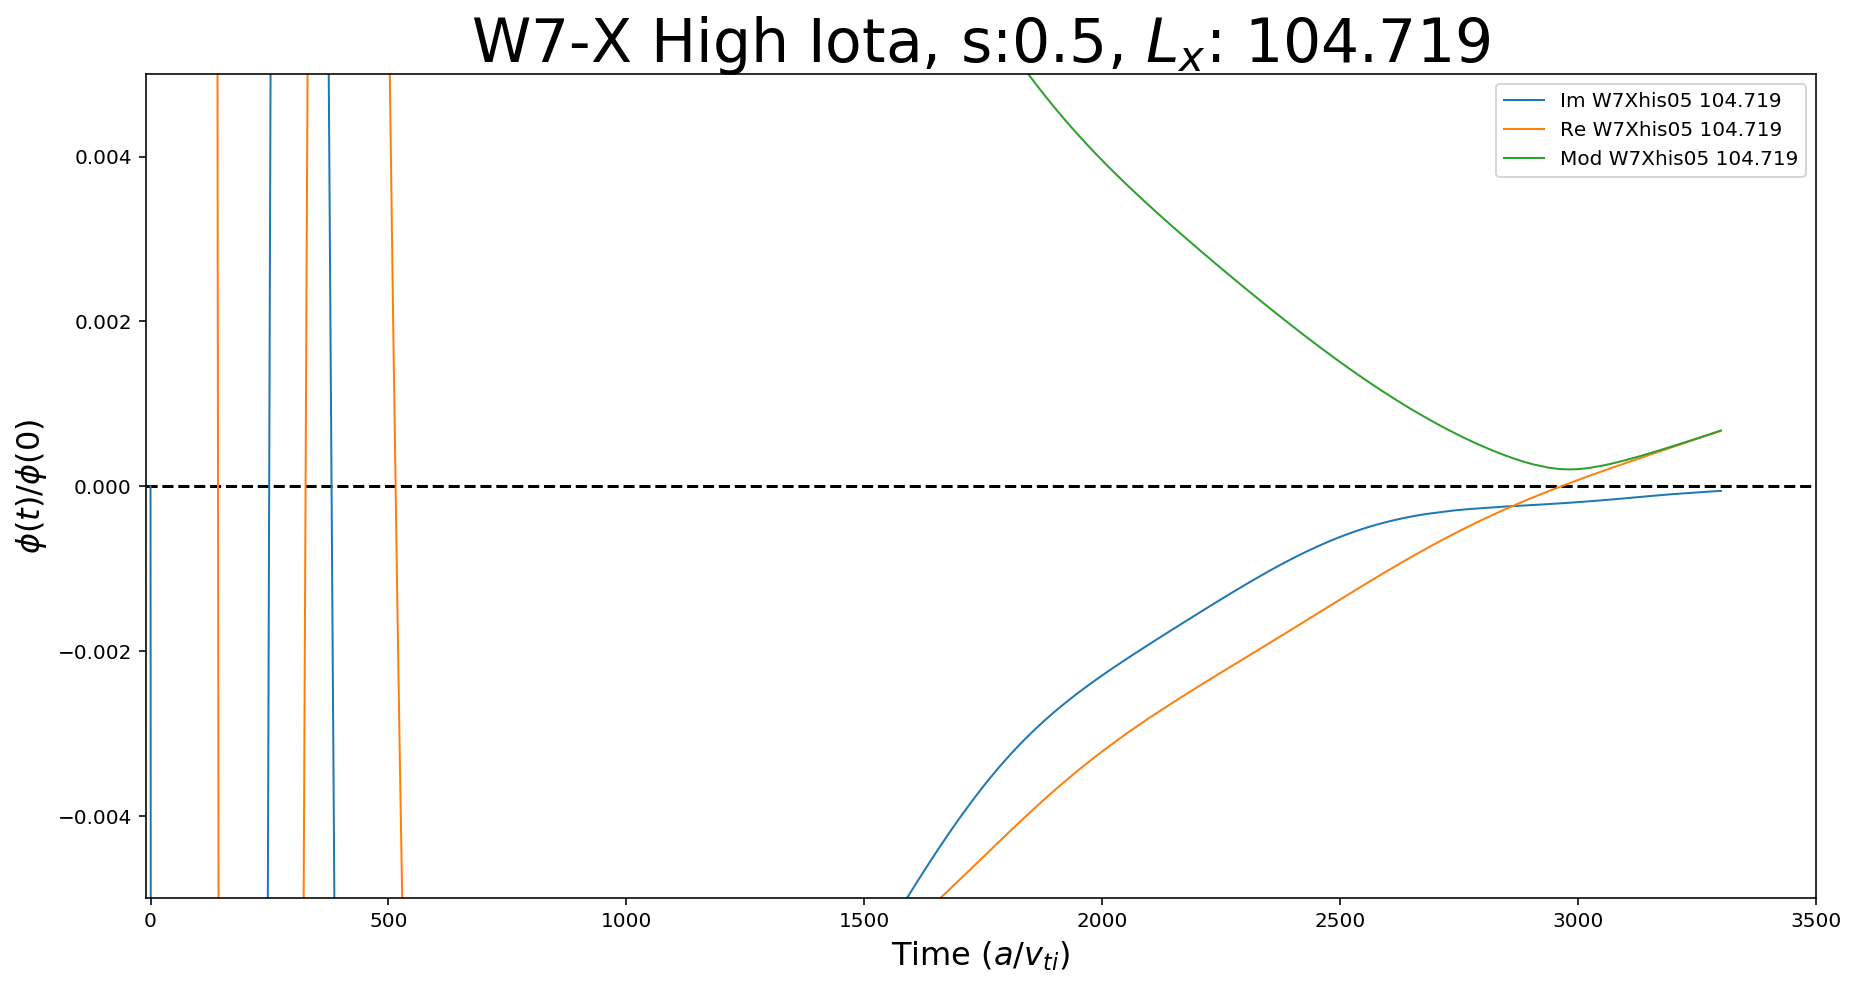

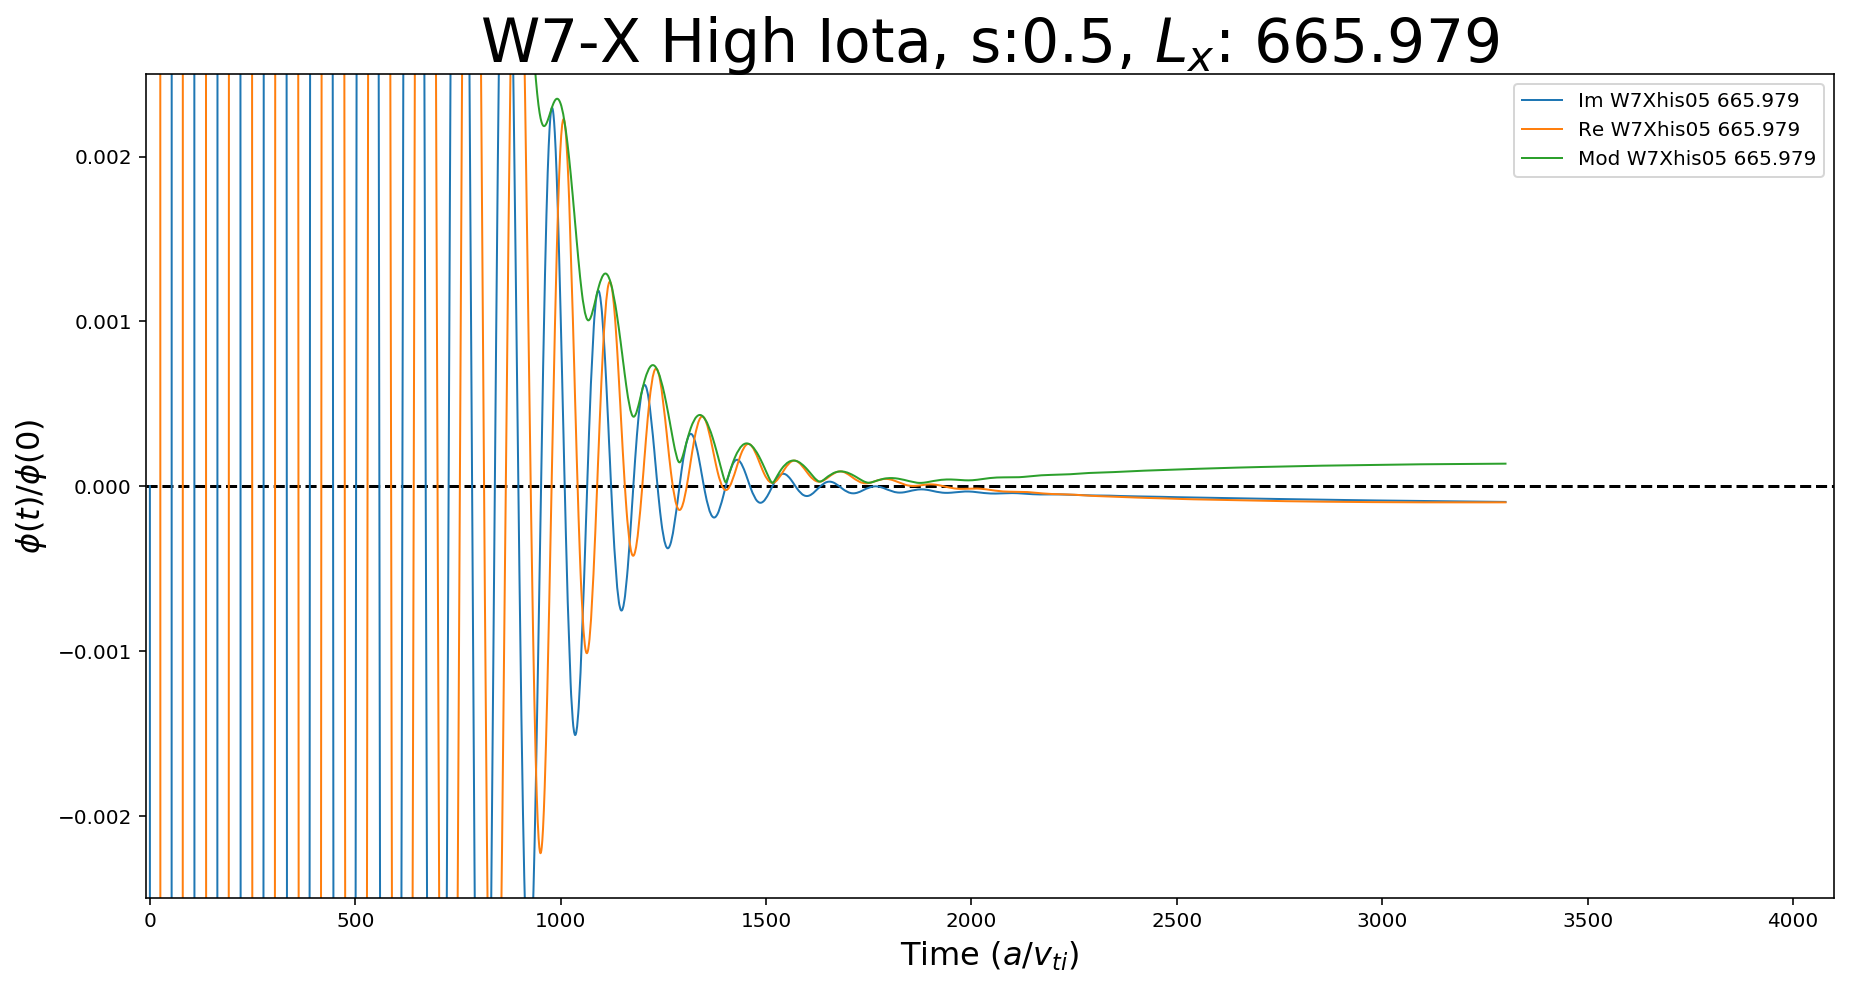

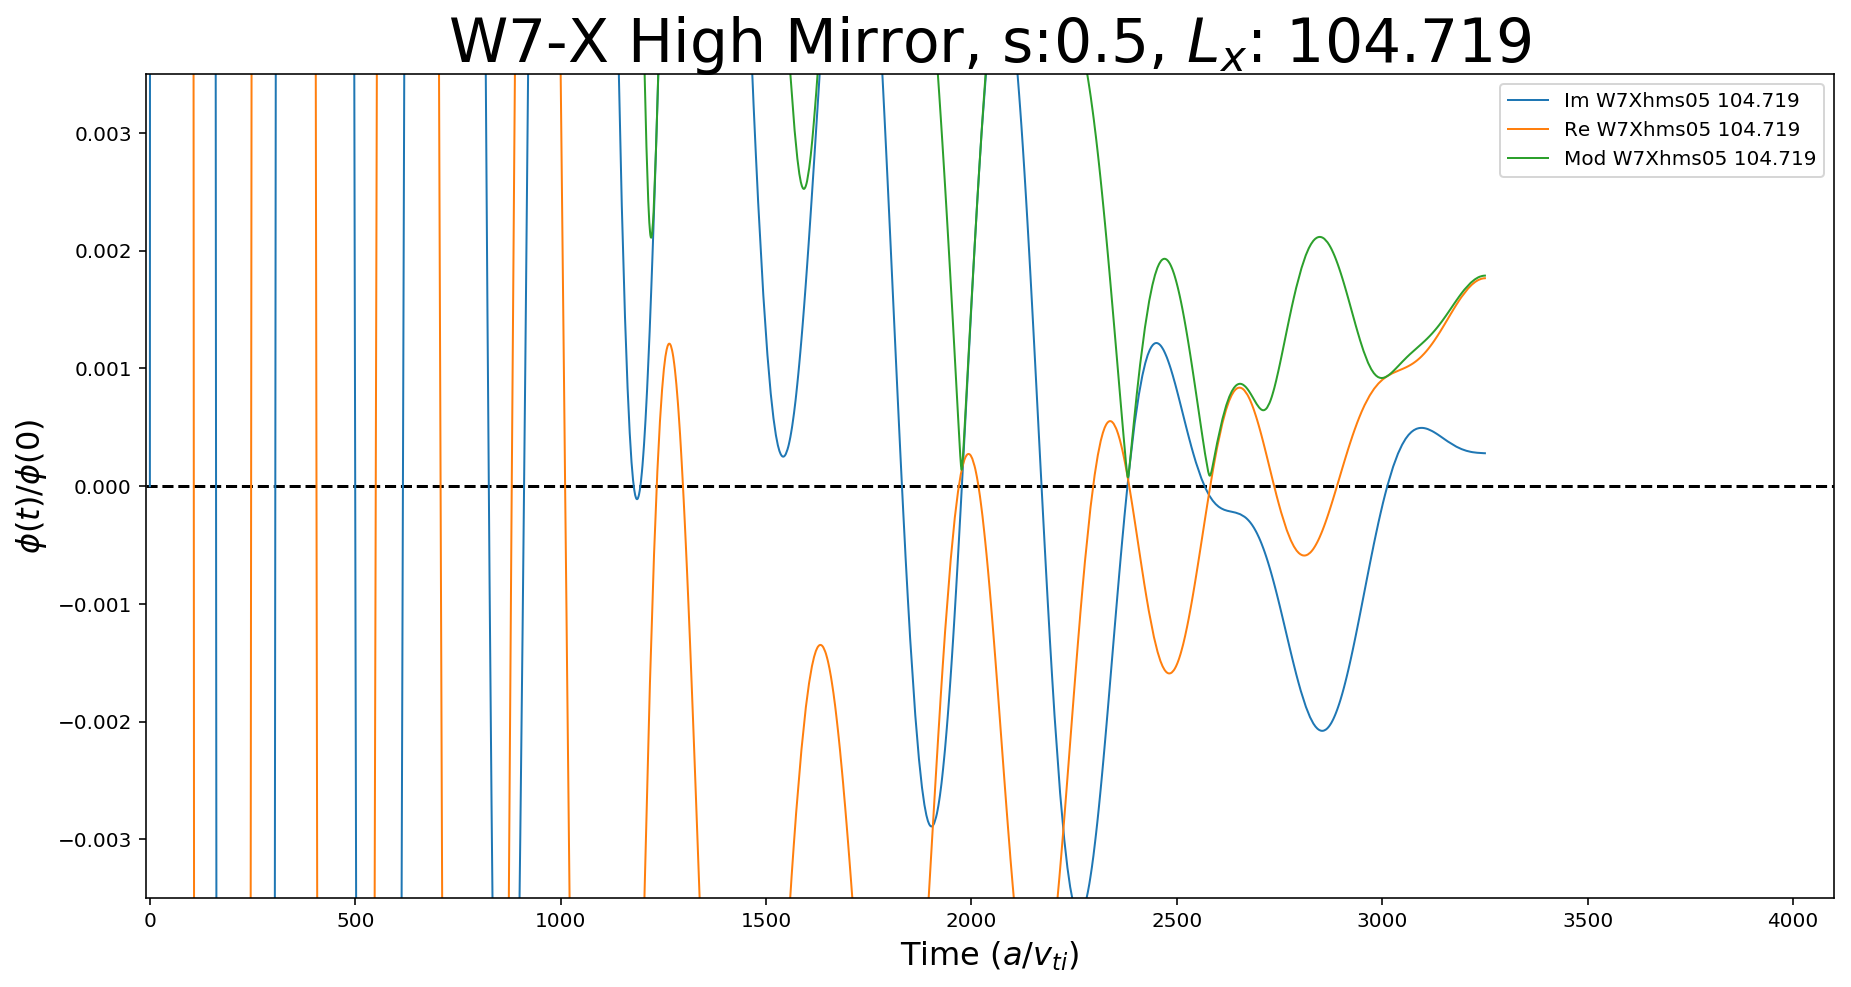

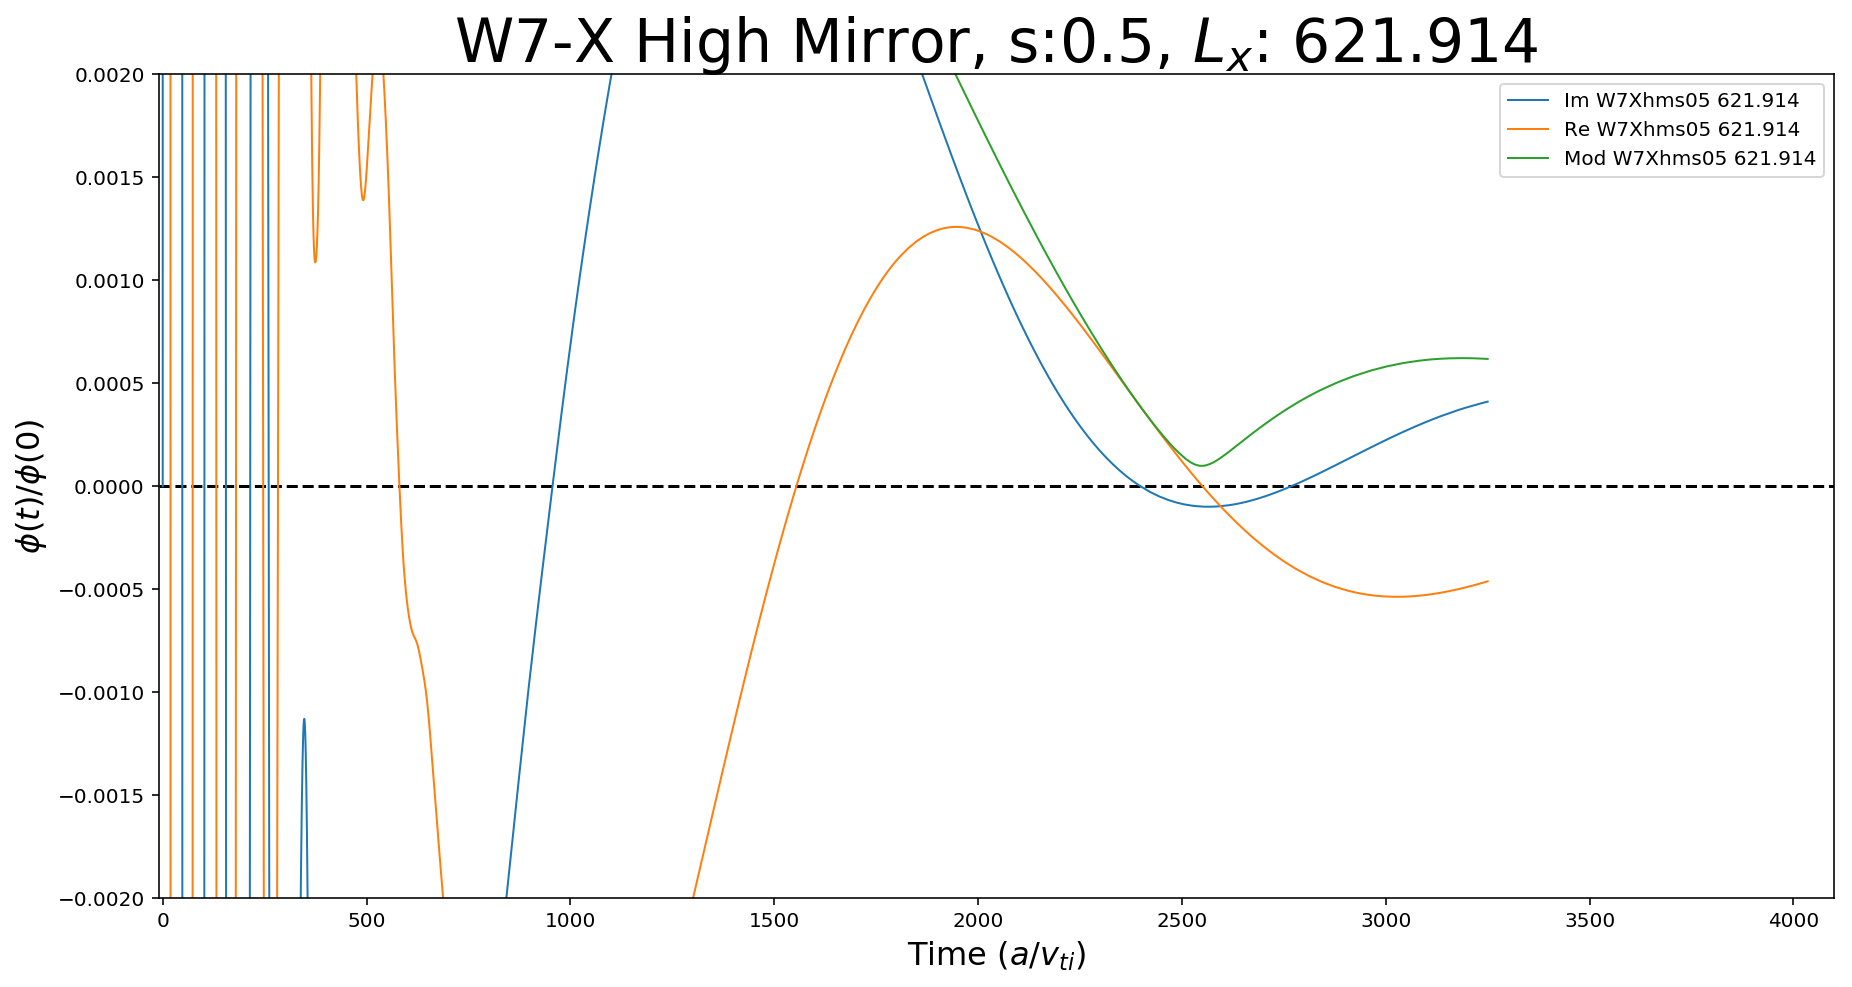

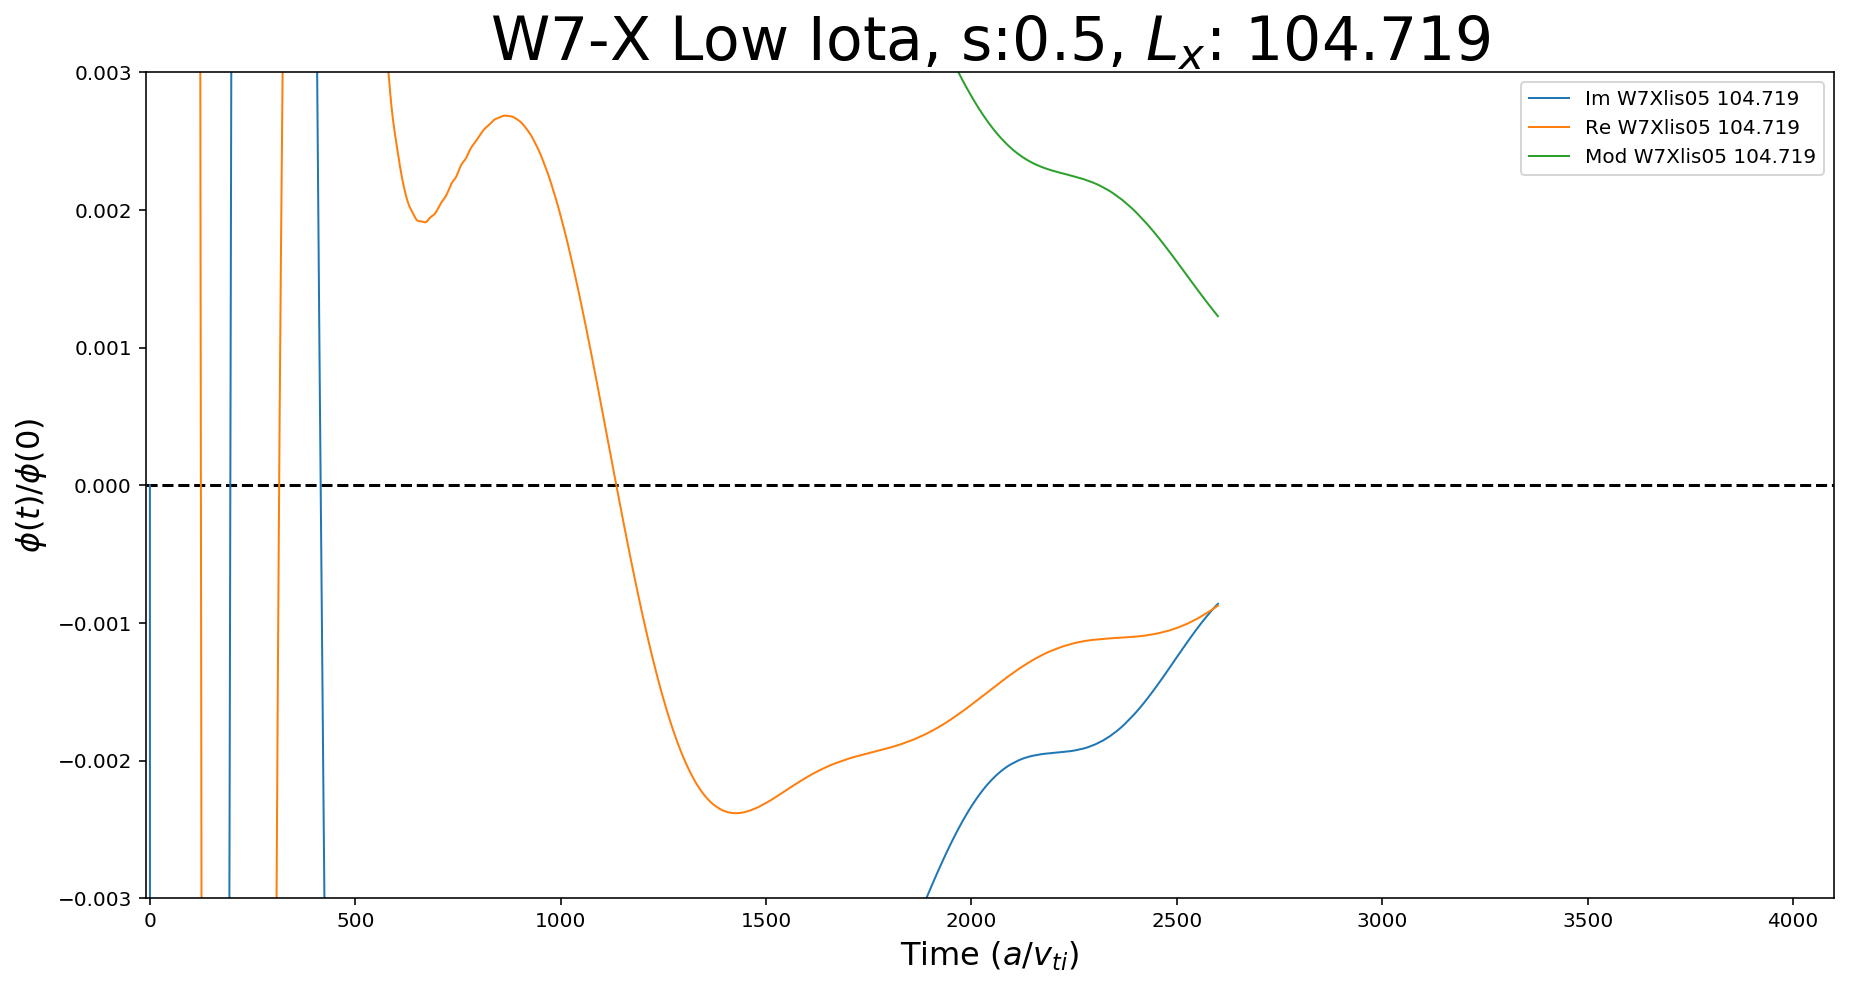

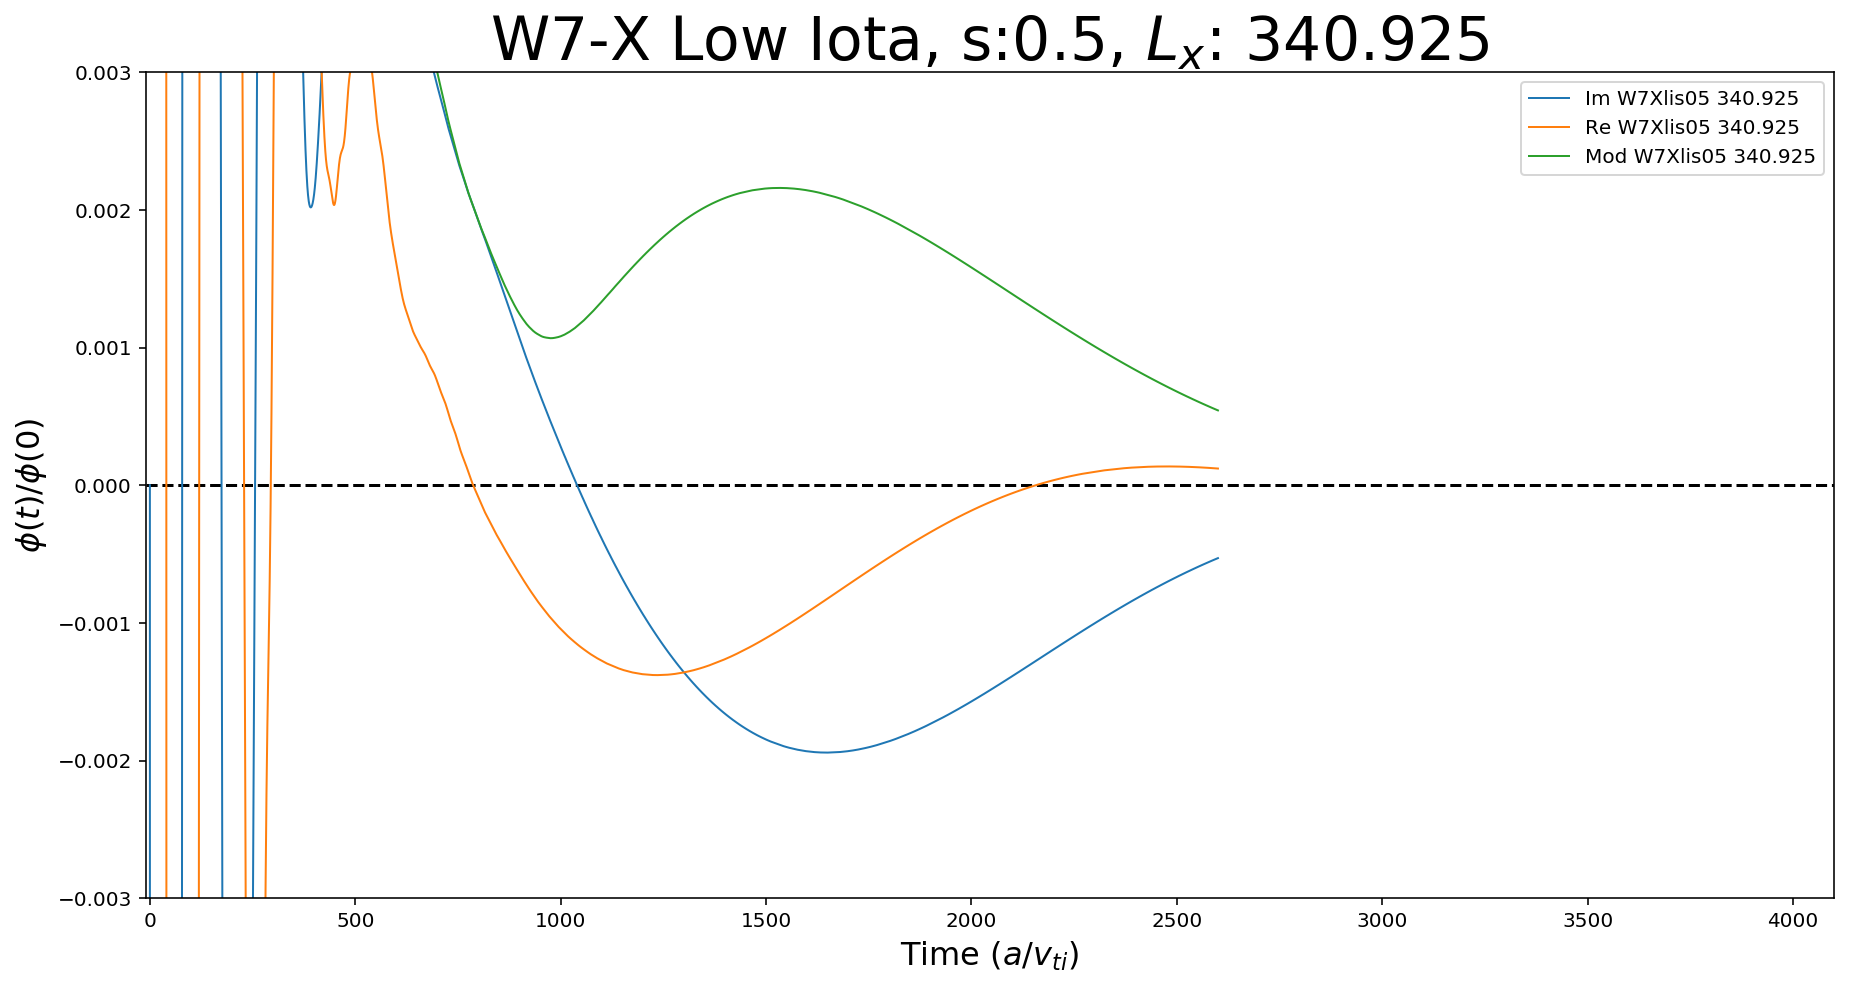

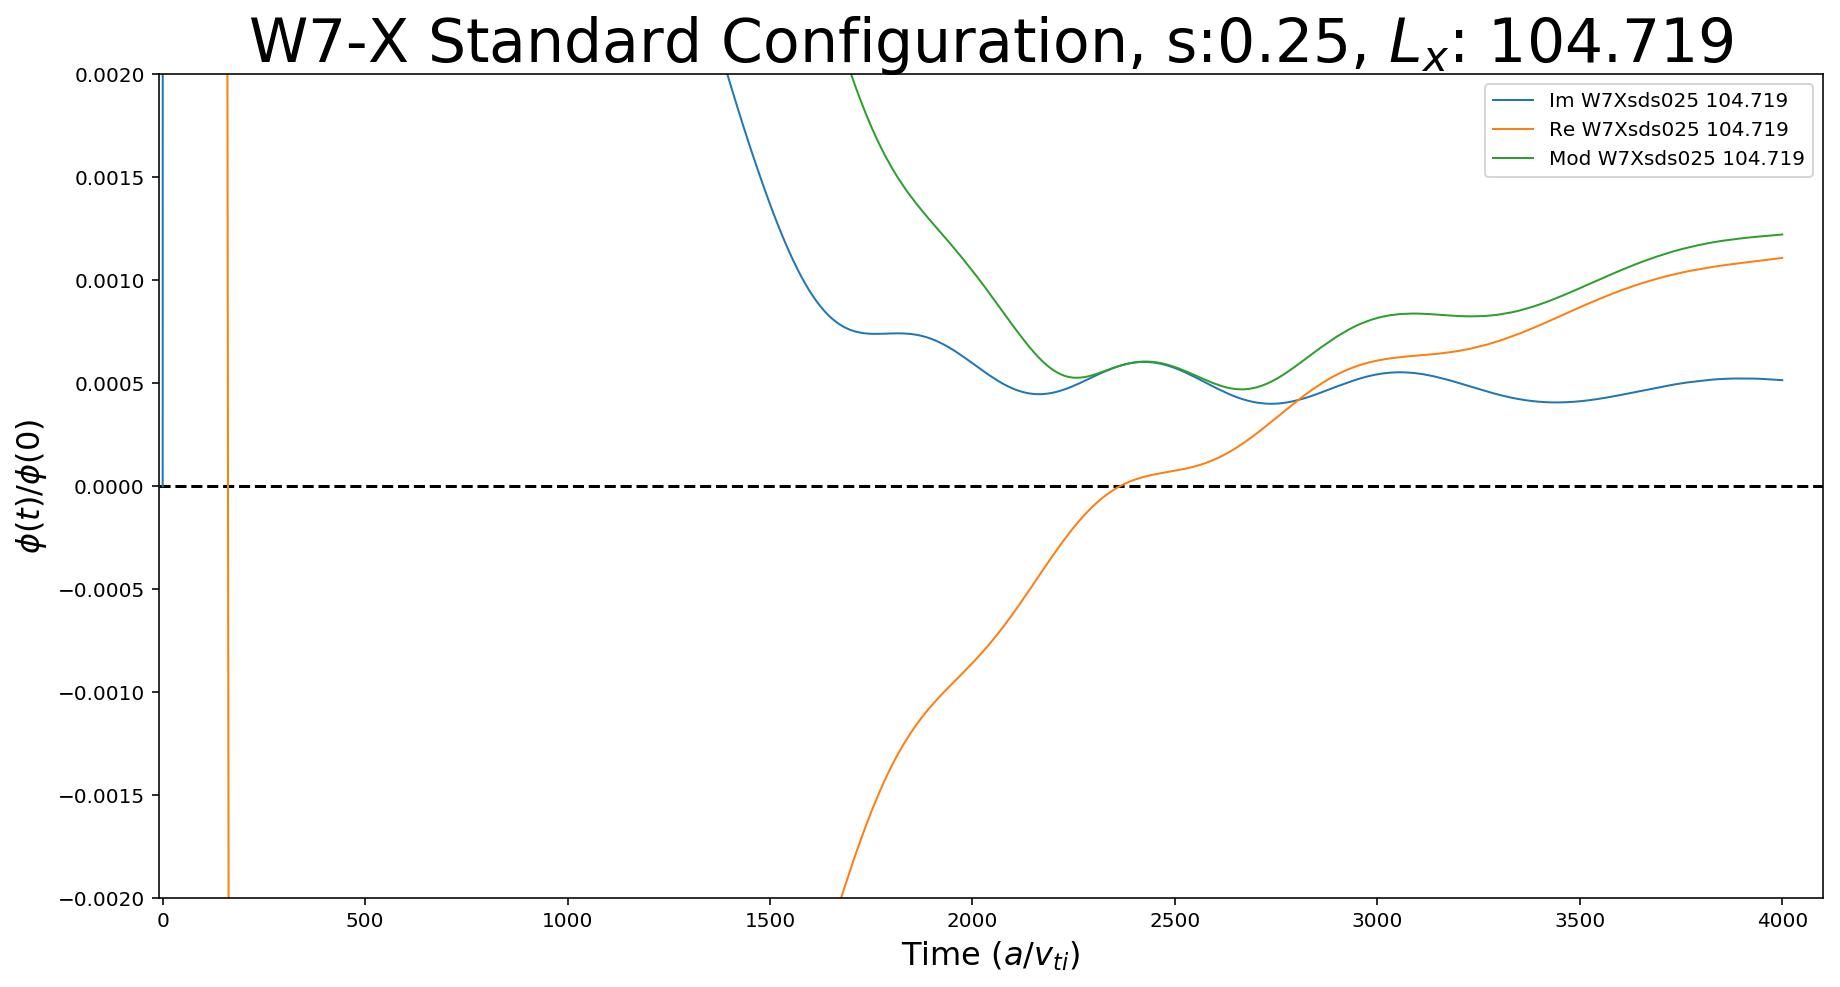

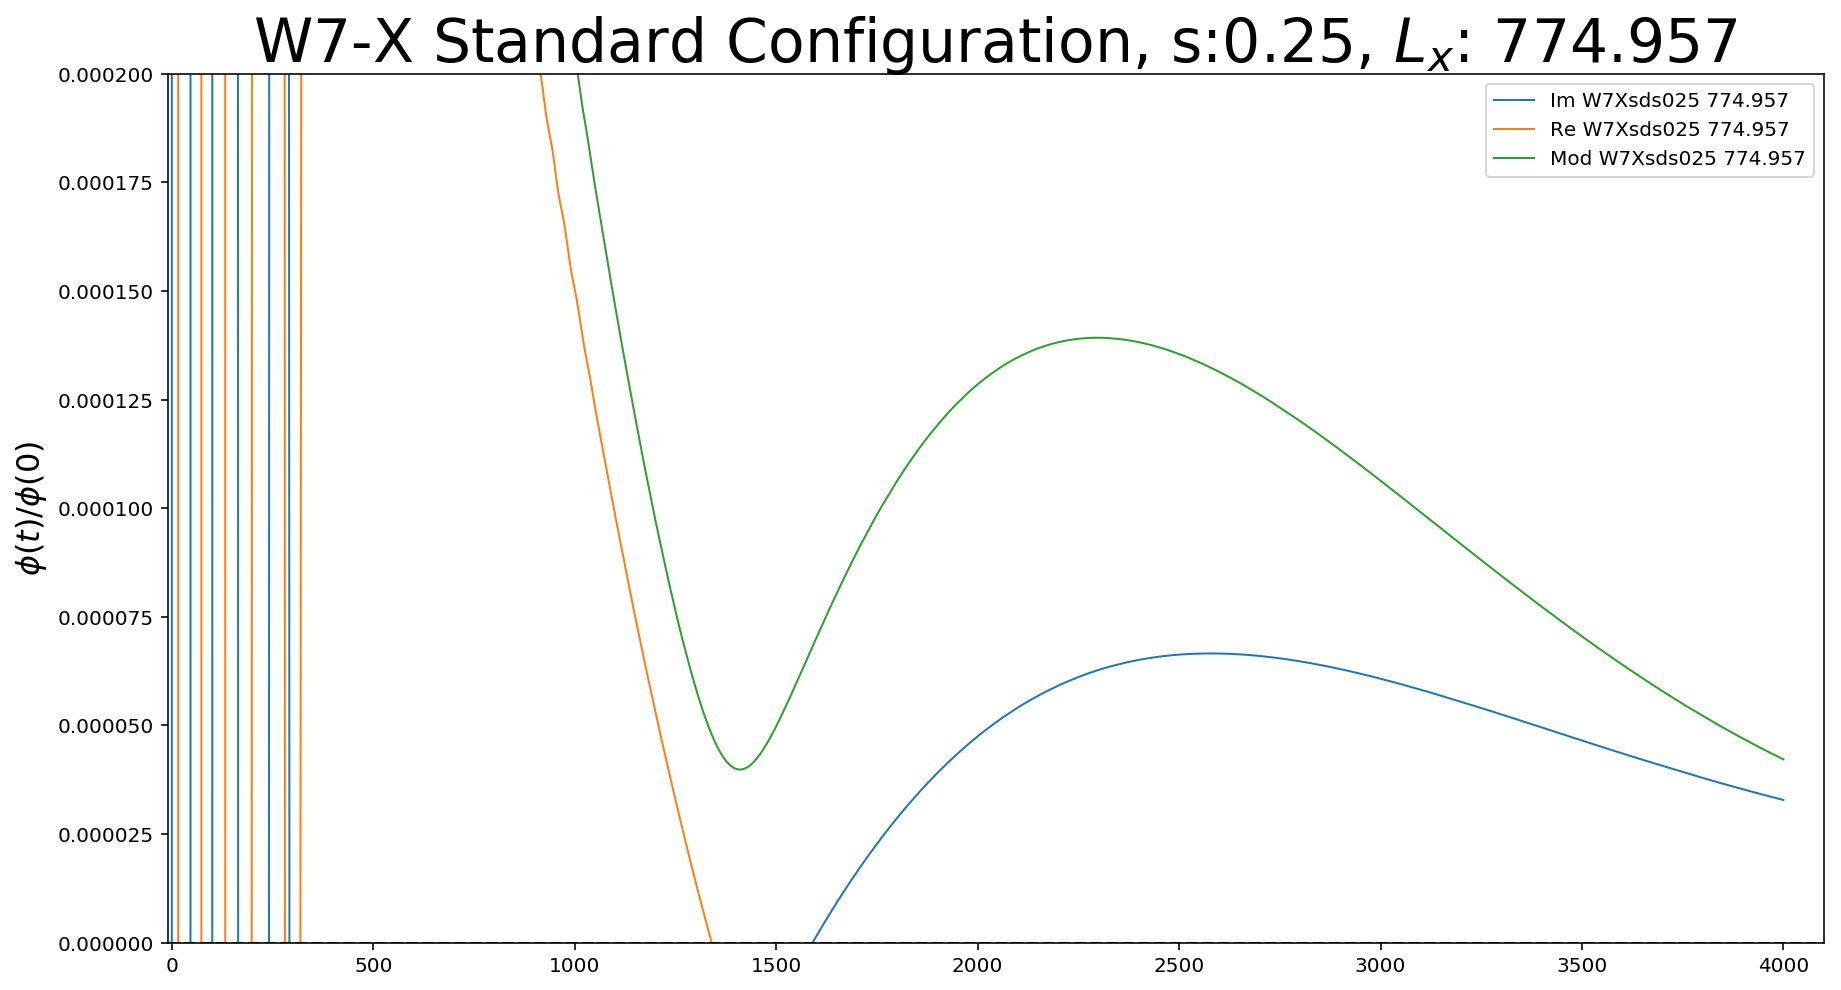

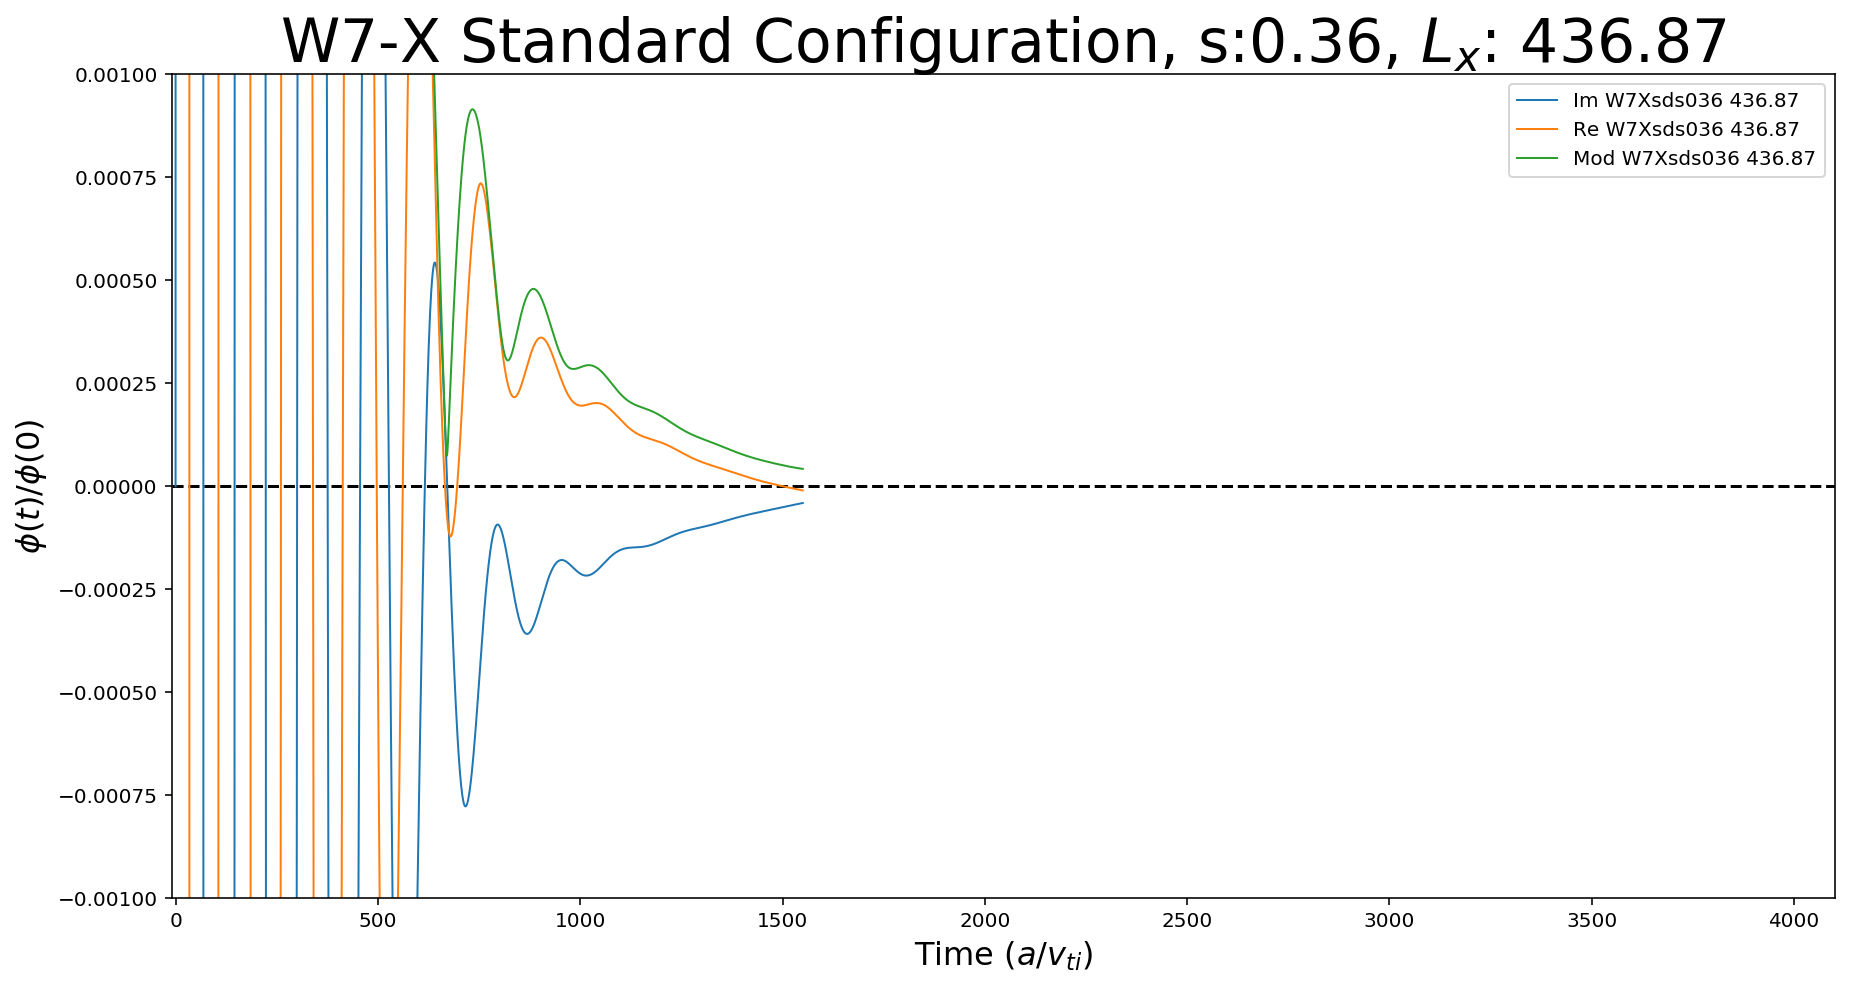

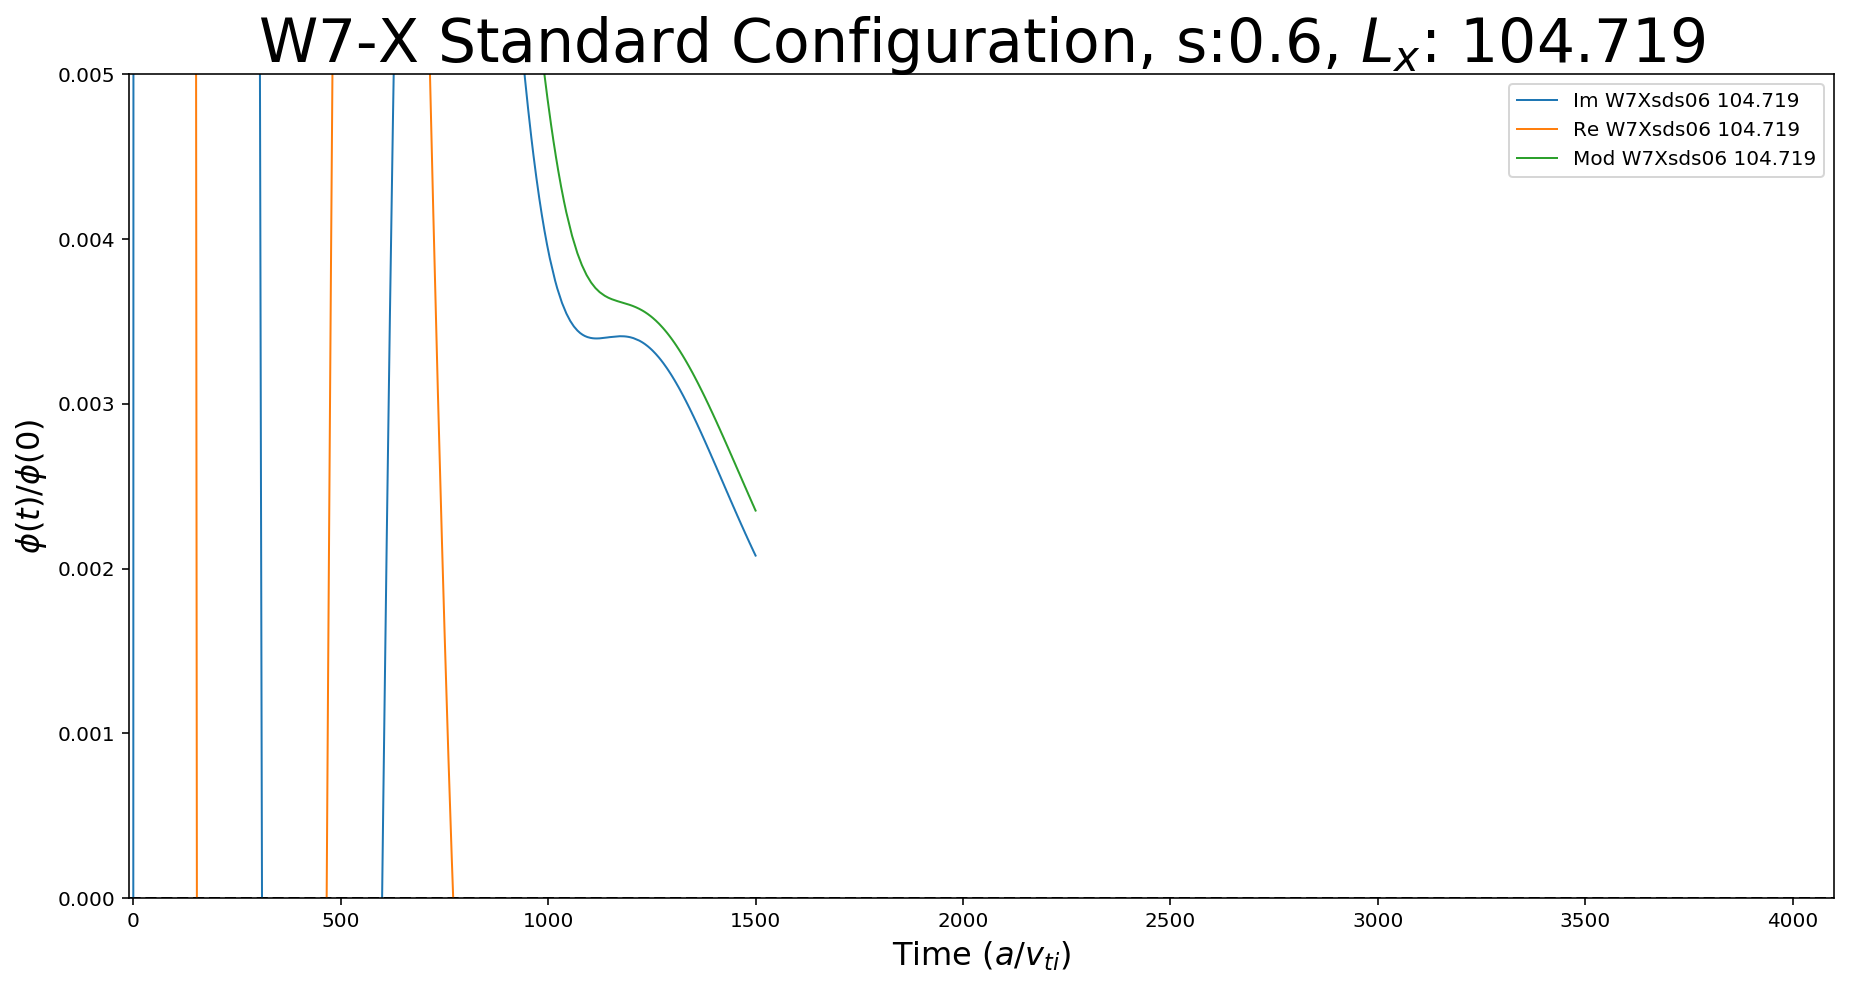

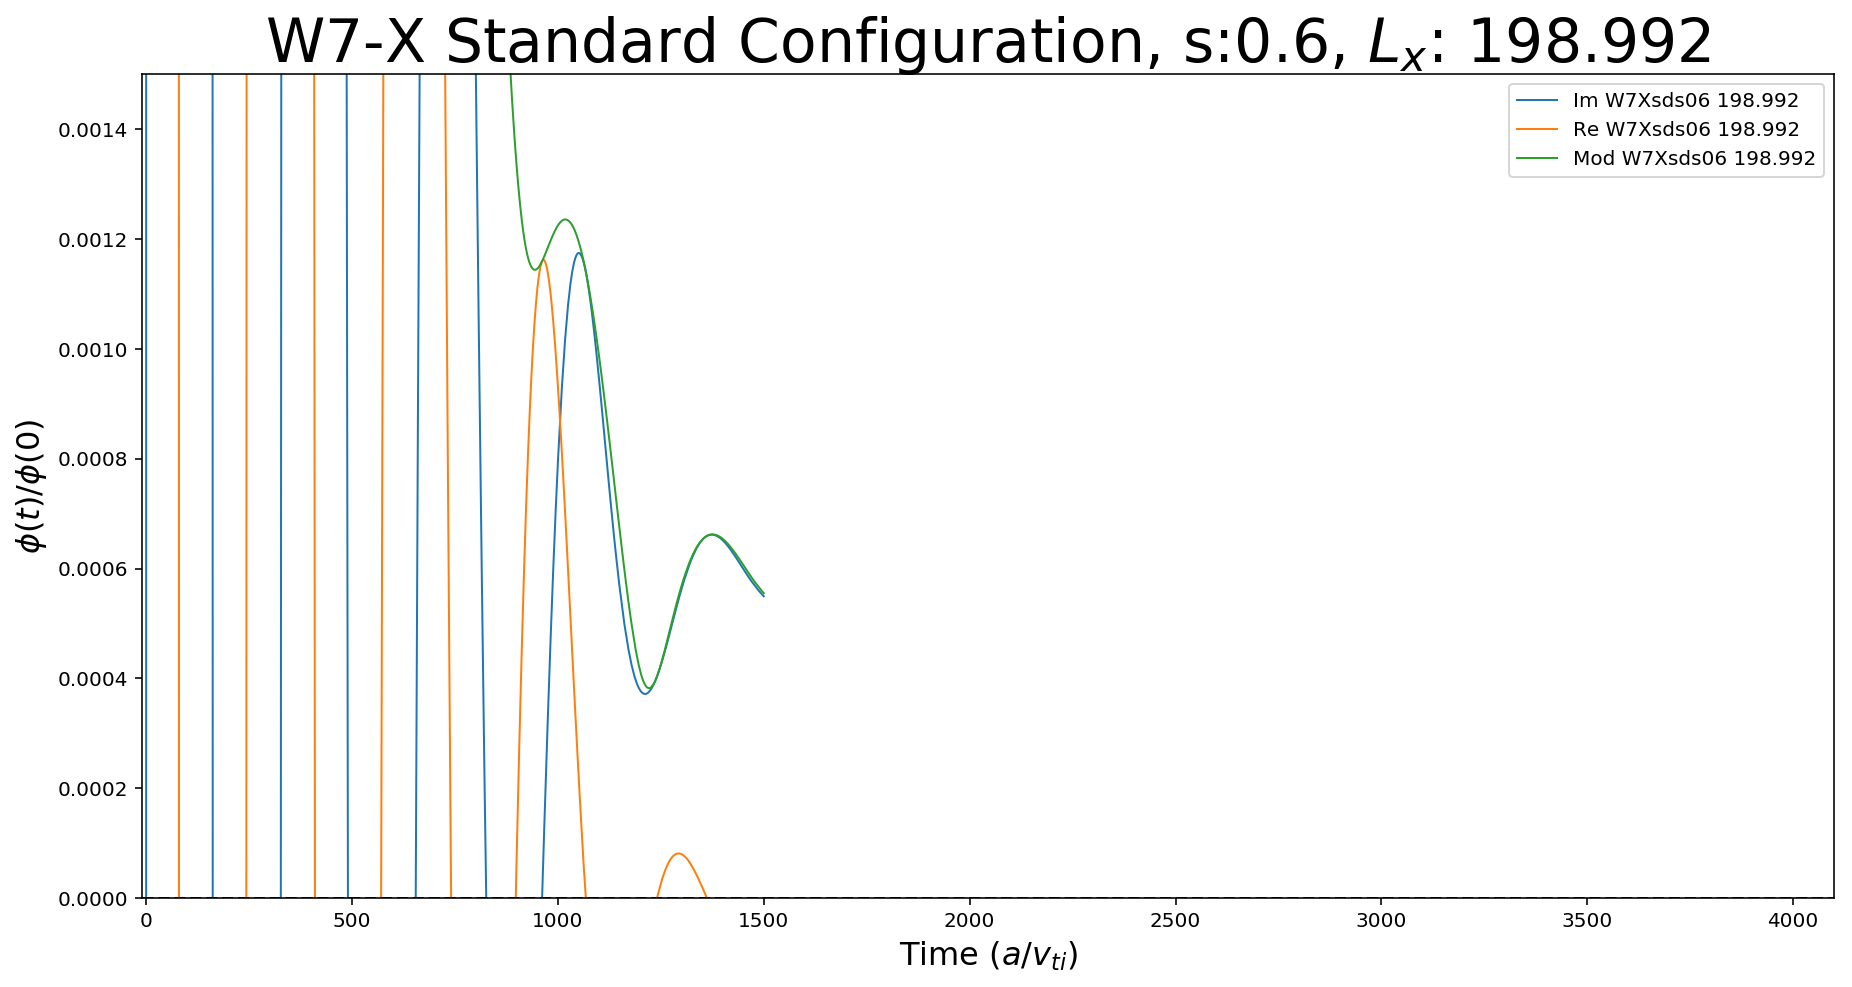

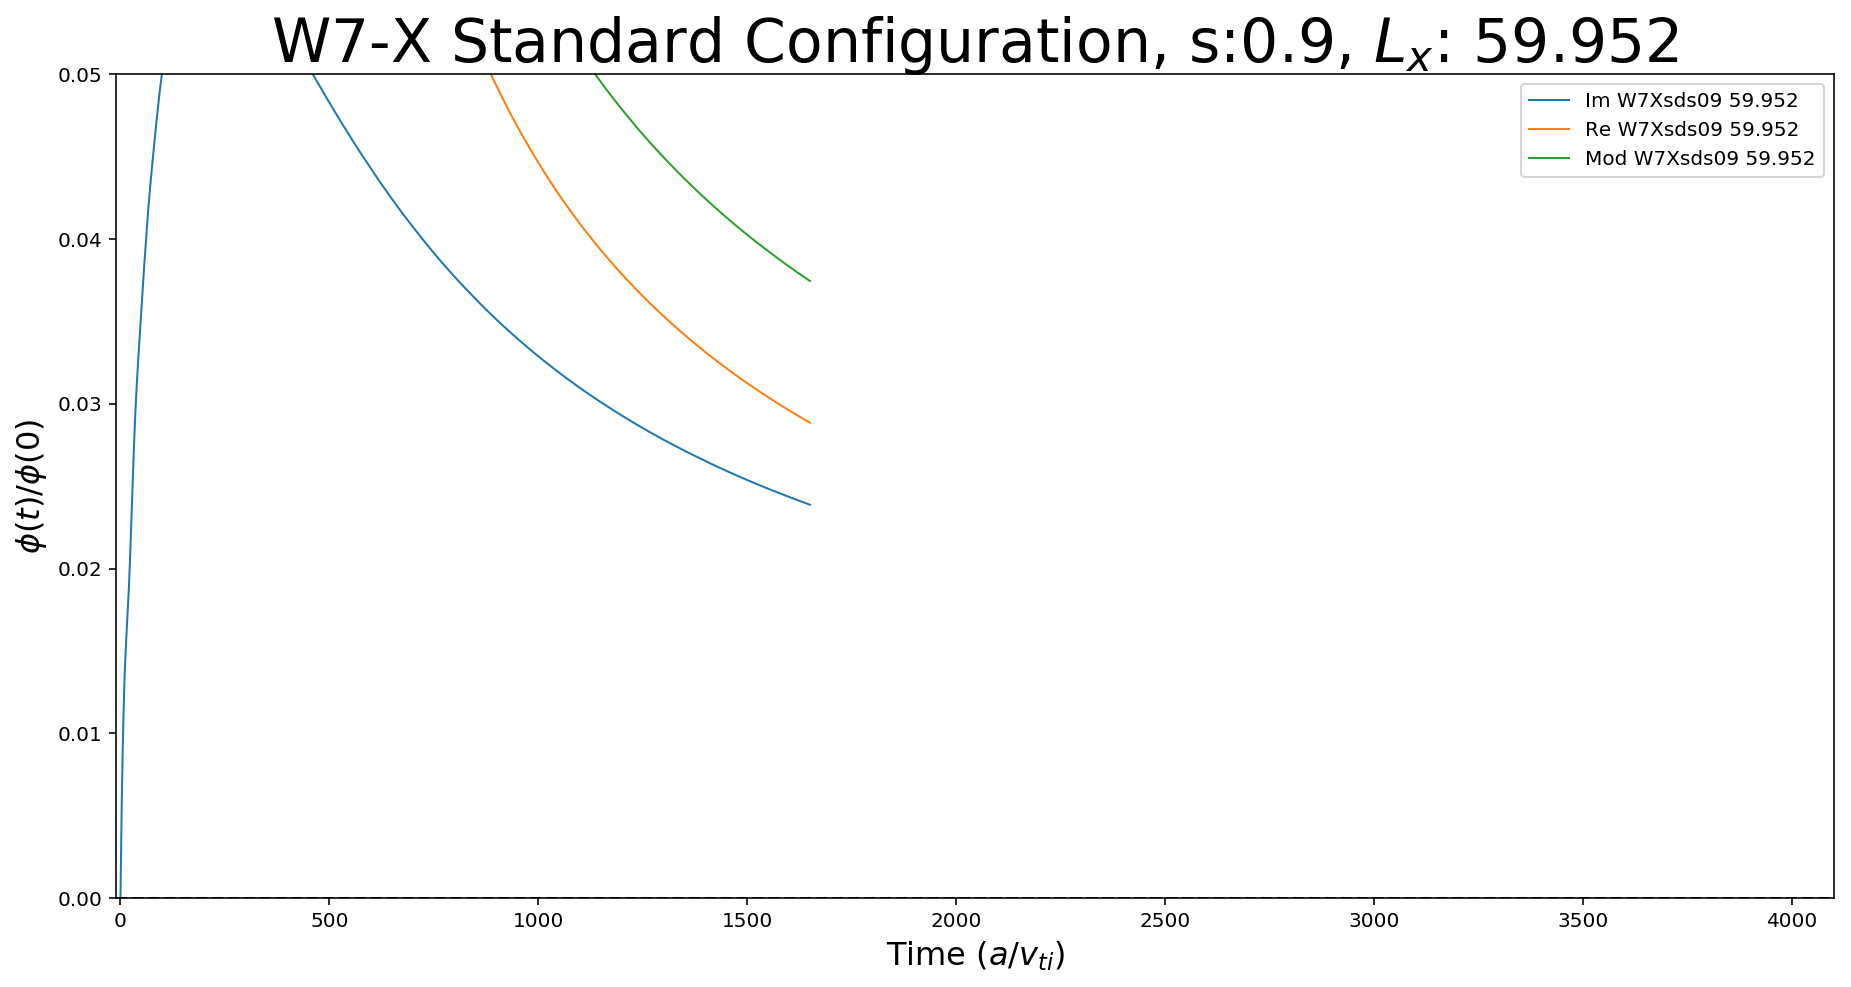

In [5]:
data1 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhis05/GAM/104.719/gamdiagions_act.dat')
E1 = (data1[:,1]*(1/data1[0, 1]))
e1 = (data1[:,2]*(1/data1[0, 1]))
t1 = data1[:,0]

data2 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhis05/GAM/665.979/gamdiagions_act.dat')
E2 = (data2[:,1]*(1/data2[0, 1]))
e2 = (data2[:,2]*(1/data2[0, 1]))
t2 = data2[:,0]

data3 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhms05/GAM/104.719/gamdiagions_act.dat')
E3 = (data3[:,1]*(1/data3[0, 1]))
e3 = (data3[:,2]*(1/data3[0, 1]))
t3 = data3[:,0]

data4 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhms05/GAM/621.914/gamdiagions_act.dat')
E4 = (data4[:,1]*(1/data4[0, 1]))
e4 = (data4[:,2]*(1/data4[0, 1]))
t4 = data4[:,0]

data5 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xlis05/GAM/104.719/gamdiagions_act.dat')
E5 = (data5[:,1]*(1/data5[0, 1]))
e5 = (data5[:,2]*(1/data5[0, 1]))
t5 = data5[:,0]

data6 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xlis05/GAM/340.925/gamdiagions_act.dat')
E6 = (data6[:,1]*(1/data6[0, 1]))
e6 = (data6[:,2]*(1/data6[0, 1]))
t6 = data6[:,0]

data7 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds025/GAM/104.719/gamdiagions_act.dat')
E7 = (data7[:,1]*(1/data7[0, 1]))
e7 = (data7[:,2]*(1/data7[0, 1]))
t7 = data7[:,0]

data8 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds025/GAM/774.957/gamdiagions_act.dat')
E8 = (data8[:,1]*(1/data8[0, 1]))
e8 = (data8[:,2]*(1/data8[0, 1]))
t8 = data8[:,0]

data9 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds036/GAM/436.87/gamdiagions_act.dat')
E9 = (data9[:,1]*(1/data9[0, 1]))
e9 = (data9[:,2]*(1/data9[0, 1]))
t9 = data9[:,0]

#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#data10 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds05/GAM/104.719/gamdiagions_act.dat')
#E10 = (data10[:,1]*(1/data10[0, 1]))
#e10 = (data10[:,2]*(1/data10[0, 1]))
#t10 = data10[:,0]
#
#data11 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds05/GAM/621.914/gamdiagions_act.dat')
#E11 = (data11[:,1]*(1/data11[0, 1]))
#e11 = (data11[:,2]*(1/data11[0, 1]))
#t11 = data11[:,0]

data12 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds06/GAM/104.719/gamdiagions_act.dat')
E12 = (data12[:,1]*(1/data12[0, 1]))
e12 = (data12[:,2]*(1/data12[0, 1]))
t12 = data12[:,0]

data13 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds06/GAM/198.992/gamdiagions_act.dat')
E13 = (data13[:,1]*(1/data13[0, 1]))
e13 = (data13[:,2]*(1/data13[0, 1]))
t13 = data13[:,0]

data14 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xsds09/GAM/59.952/gamdiagions_act.dat')
E14 = (data14[:,1]*(1/data14[0, 1]))
e14 = (data14[:,2]*(1/data14[0, 1]))
t14 = data14[:,0]

fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('W7-X High Iota, s:0.5, $L_{x}$: 104.719', fontsize=30)
ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax1.axhline(y=0, color='black', linestyle='dashed')
plt.ylim([-0.005,0.005])
plt.xlim([-10,3500])
#plt.ylim([0,0.1])

Q1 = np.sqrt(E1**2+e1**2)
ax1.plot(t1, e1, linewidth=1, label=('Im W7Xhis05 104.719'))
ax1.plot(t1, E1, linewidth=1, label=('Re W7Xhis05 104.719'))
ax1.plot(t1, Q1, linewidth=1, label=('Mod W7Xhis05 104.719'))
plt.legend()
fig.tight_layout()

fig, ax2 = plt.subplots(figsize=(13, 7))
plt.title('W7-X High Iota, s:0.5, $L_{x}$: 665.979', fontsize=30)
ax2.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax2.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax2.axhline(y=0, color='black', linestyle='dashed')
plt.ylim([-0.0025,0.0025])
plt.xlim([-10,4100])

Q2 = np.sqrt(E2**2+e2**2)
ax2.plot(t2, e2, linewidth=1, label=('Im W7Xhis05 665.979'))
ax2.plot(t2, E2, linewidth=1, label=('Re W7Xhis05 665.979'))
ax2.plot(t2, Q2, linewidth=1, label=('Mod W7Xhis05 665.979'))
plt.legend()
fig.tight_layout()

fig, ax3 = plt.subplots(figsize=(13, 7))
plt.title('W7-X High Mirror, s:0.5, $L_{x}$: 104.719', fontsize=30)
ax3.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax3.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax3.axhline(y=0, color='black', linestyle='dashed')
plt.ylim([-0.0035,0.0035])
plt.xlim([-10,4100])

Q3 = np.sqrt(E3**2+e3**2)
ax3.plot(t3, e3, linewidth=1, label=('Im W7Xhms05 104.719'))
ax3.plot(t3, E3, linewidth=1, label=('Re W7Xhms05 104.719'))
ax3.plot(t3, Q3, linewidth=1, label=('Mod W7Xhms05 104.719'))
plt.legend()
fig.tight_layout()

fig, ax4 = plt.subplots(figsize=(13, 7))
plt.title('W7-X High Mirror, s:0.5, $L_{x}$: 621.914', fontsize=30)
ax4.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax4.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax4.axhline(y=0, color='black', linestyle='dashed')
plt.ylim([-0.002,0.002])
plt.xlim([-10,4100])

Q4 = np.sqrt(E4**2+e4**2)
ax4.plot(t4, e4, linewidth=1, label=('Im W7Xhms05 621.914'))
ax4.plot(t4, E4, linewidth=1, label=('Re W7Xhms05 621.914'))
ax4.plot(t4, Q4, linewidth=1, label=('Mod W7Xhms05 621.914'))
plt.legend()
fig.tight_layout()

fig, ax5 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Low Iota, s:0.5, $L_{x}$: 104.719', fontsize=30)
ax5.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax5.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax5.axhline(y=0, color='black', linestyle='dashed')
plt.ylim([-0.003,0.003])
plt.xlim([-10,4100])

Q5 = np.sqrt(E5**2+e5**2)
ax5.plot(t5, e5, linewidth=1, label=('Im W7Xlis05 104.719'))
ax5.plot(t5, E5, linewidth=1, label=('Re W7Xlis05 104.719'))
ax5.plot(t5, Q5, linewidth=1, label=('Mod W7Xlis05 104.719'))
plt.legend()
fig.tight_layout()

fig, ax6 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Low Iota, s:0.5, $L_{x}$: 340.925', fontsize=30)
ax6.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax6.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax6.axhline(y=0, color='black', linestyle='dashed')
plt.ylim([-0.003,0.003])
plt.xlim([-10,4100])

Q6 = np.sqrt(E6**2+e6**2)
ax6.plot(t6, e6, linewidth=1, label=('Im W7Xlis05 340.925'))
ax6.plot(t6, E6, linewidth=1, label=('Re W7Xlis05 340.925'))
ax6.plot(t6, Q6, linewidth=1, label=('Mod W7Xlis05 340.925'))
plt.legend()
fig.tight_layout()

fig, ax7 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Standard Configuration, s:0.25, $L_{x}$: 104.719', fontsize=30)
ax7.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax7.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax7.axhline(y=0, color='black', linestyle='dashed')
plt.ylim([-0.002,0.002])
plt.xlim([-10,4100])

Q7 = np.sqrt(E7**2+e7**2)
ax7.plot(t7, e7, linewidth=1, label=('Im W7Xsds025 104.719'))
ax7.plot(t7, E7, linewidth=1, label=('Re W7Xsds025 104.719'))
ax7.plot(t7, Q7, linewidth=1, label=('Mod W7Xsds025 104.719'))
plt.legend()
fig.tight_layout()

fig, ax8 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Standard Configuration, s:0.25, $L_{x}$: 774.957', fontsize=30)
ax8.set_ylabel('Time ($a / v_{ti}$)',fontsize=16)
ax8.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax8.axhline(y=0, color='black', linestyle='dashed')
plt.ylim([0,0.0002])
plt.xlim([-10,4100])

Q8 = np.sqrt(E8**2+e8**2)
ax8.plot(t8, e8, linewidth=1, label=('Im W7Xsds025 774.957'))
ax8.plot(t8, E8, linewidth=1, label=('Re W7Xsds025 774.957'))
ax8.plot(t8, Q8, linewidth=1, label=('Mod W7Xsds025 774.957'))
plt.legend()
fig.tight_layout()

fig, ax9 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Standard Configuration, s:0.36, $L_{x}$: 436.87', fontsize=30)
ax9.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax9.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax9.axhline(y=0, color='black', linestyle='dashed')
plt.ylim([-0.001,0.001])
plt.xlim([-10,4100])

Q9 = np.sqrt(E9**2+e9**2)
ax9.plot(t9, e9, linewidth=1, label=('Im W7Xsds036 436.87'))
ax9.plot(t9, E9, linewidth=1, label=('Re W7Xsds036 436.87'))
ax9.plot(t9, Q9, linewidth=1, label=('Mod W7Xsds036 436.87'))
plt.legend()
fig.tight_layout()

#####onderstaande data (10) en (11) is niet van sds05 maar van hms05####
#fig, ax10 = plt.subplots(figsize=(13, 7))
#plt.title('W7-X Standard Configuration, s:0.5, $L_{x}$: 104.719', fontsize=30)
#ax10.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
#ax10.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
#ax10.axhline(y=0, color='black', linestyle='dashed')
#plt.xlim([-10,3000])
#
#Q10 = np.sqrt(E10**2+e10**2)
#ax10.plot(t10, e10, linewidth=1, label=('Im W7Xsds05 104.719'))
#ax10.plot(t10, E10, linewidth=1, label=('Re W7Xsds05 104.719'))
#ax10.plot(t10, Q10, linewidth=1, label=('Mod W7Xsds05 104.719'))
#plt.legend()
#fig.tight_layout()
#
#fig, ax11 = plt.subplots(figsize=(13, 7))
#plt.title('W7-X Standard Configuration, s:0.5, $L_{x}$: 621.914', fontsize=30)
#ax11.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
#ax11.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
#ax11.axhline(y=0, color='black', linestyle='dashed')
#plt.xlim([-10,3000])
#
#Q11 = np.sqrt(E11**2+e11**2)
#ax11.plot(t11, e11, linewidth=1, label=('Im W7Xsds05 621.914'))
#ax11.plot(t11, E11, linewidth=1, label=('Re W7Xsds05 621.914'))
#ax11.plot(t11, Q11, linewidth=1, label=('Mod W7Xsds05 621.914'))
#plt.legend()
#fig.tight_layout()

fig, ax12 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Standard Configuration, s:0.6, $L_{x}$: 104.719', fontsize=30)
ax12.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax12.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax12.axhline(y=0, color='black', linestyle='dashed')
plt.ylim([0,0.005])
plt.xlim([-10,4100])

Q12 = np.sqrt(E12**2+e12**2)
ax12.plot(t12, e12, linewidth=1, label=('Im W7Xsds06 104.719'))
ax12.plot(t12, E12, linewidth=1, label=('Re W7Xsds06 104.719'))
ax12.plot(t12, Q12, linewidth=1, label=('Mod W7Xsds06 104.719'))
plt.legend()
fig.tight_layout()

fig, ax13 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Standard Configuration, s:0.6, $L_{x}$: 198.992', fontsize=30)
ax13.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax13.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax13.axhline(y=0, color='black', linestyle='dashed')
plt.ylim([0,0.0015])
plt.xlim([-10,4100])

Q13 = np.sqrt(E13**2+e13**2)
ax13.plot(t13, e13, linewidth=1, label=('Im W7Xsds06 198.992'))
ax13.plot(t13, E13, linewidth=1, label=('Re W7Xsds06 198.992'))
ax13.plot(t13, Q13, linewidth=1, label=('Mod W7Xsds06 198.992'))
plt.legend()
fig.tight_layout()

fig, ax14 = plt.subplots(figsize=(13, 7))
plt.title('W7-X Standard Configuration, s:0.9, $L_{x}$: 59.952', fontsize=30)
ax14.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax14.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax14.axhline(y=0, color='black', linestyle='dashed')
plt.ylim([0,0.05])
plt.xlim([-10,4100])

Q14 = np.sqrt(E14**2+e14**2)
ax14.plot(t14, e14, linewidth=1, label=('Im W7Xsds09 59.952'))
ax14.plot(t14, E14, linewidth=1, label=('Re W7Xsds09 59.952'))
ax14.plot(t14, Q14, linewidth=1, label=('Mod W7Xsds09 59.952'))
plt.legend()
fig.tight_layout()
#plt.savefig('../../CMSS_2018/Poster/Salpha_nlzf_plot.pdf', format='pdf', dpi=1200) 